In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def read_obs_list():
    global OBS_LIST
    OBS_LIST = pd.read_csv('../obs_list.csv', parse_dates=['Date'], index_col='Observation')
    
def read_ew_stats(filename):
    obsdata = pd.read_csv(filename, parse_dates=['Date'])
    obsdata = obsdata.join(OBS_LIST, on='Observation', rsuffix='_obslist')
    obsdata = obsdata[obsdata['For Photometry'] == 1]
    print(f'** SUMMARY STATISTICS - {filename} **')
    print('Unique observation names:', len(obsdata.groupby('Observation')))
    print('Total slices:', len(obsdata))
    print('Starting date:', obsdata['Date'].min())
    print('Ending date:', obsdata['Date'].max())
    print('Time span:', obsdata['Date'].max()-obsdata['Date'].min())
    obsdata['Mu'] = np.abs(np.cos(np.radians(obsdata['Mean Emission'])))
    obsdata['Mu0'] = np.abs(np.cos(np.radians(obsdata['Incidence'])))
    return obsdata

read_obs_list()
obsdata = read_ew_stats('../data_files/ew_stats_1zone_0_1.csv')

** SUMMARY STATISTICS - ../data_files/ew_stats_1zone_0_1.csv **
Unique observation names: 210
Total slices: 38583
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27


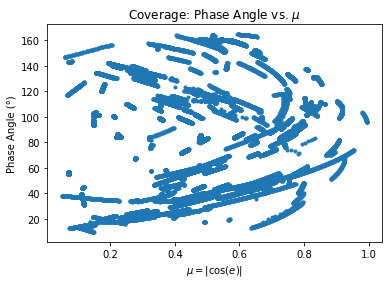

In [3]:
plt.plot(np.abs(np.cos(np.radians(obsdata['Mean Emission']))), obsdata['Mean Phase'], '.')
plt.xlabel('$\mu=|\cos(e)|$')
plt.ylabel('Phase Angle (°)')
_=plt.title('Coverage: Phase Angle vs. $\mu$')

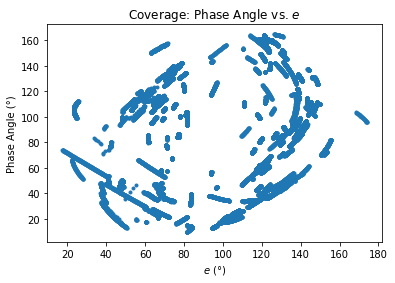

In [4]:
plt.plot(obsdata['Mean Emission'], obsdata['Mean Phase'], '.')
plt.xlabel('$e$ (°)')
plt.ylabel('Phase Angle (°)')
_=plt.title('Coverage: Phase Angle vs. $e$')

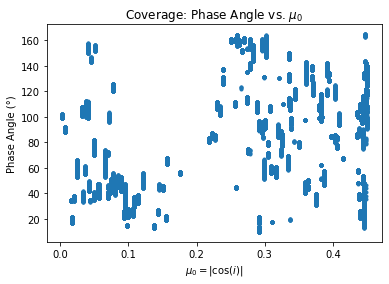

In [5]:
plt.plot(np.abs(np.cos(np.radians(obsdata['Incidence']))), obsdata['Mean Phase'], '.')
plt.xlabel('$\mu_0=|\cos(i)|$')
plt.ylabel('Phase Angle (°)')
_=plt.title('Coverage: Phase Angle vs. $\mu_0$')

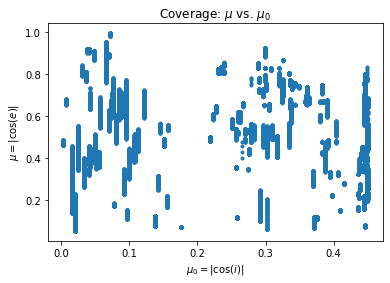

In [6]:
plt.plot(np.abs(np.cos(np.radians(obsdata['Incidence']))), np.abs(np.cos(np.radians(obsdata['Mean Emission']))), '.')
plt.xlabel('$\mu_0=|\cos(i)|$')
plt.ylabel('$\mu=|\cos(e)|$')
_=plt.title('Coverage: $\mu$ vs. $\mu_0$')

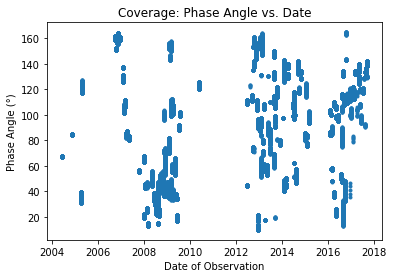

In [7]:
plt.plot(obsdata['Date'], obsdata['Mean Phase'], '.')
plt.xlabel('Date of Observation')
plt.ylabel('Phase Angle (°)')
_=plt.title('Coverage: Phase Angle vs. Date')

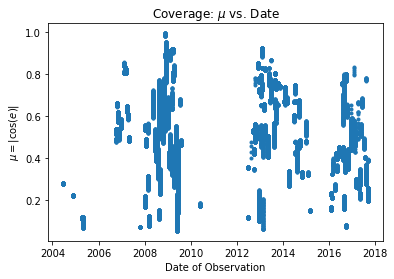

In [8]:
plt.plot(obsdata['Date'], np.abs(np.cos(np.radians(obsdata['Mean Emission']))),  '.')
plt.xlabel('Date of Observation')
plt.ylabel('$\mu=|\cos(e)|$')
_=plt.title('Coverage: $\mu$ vs. Date')

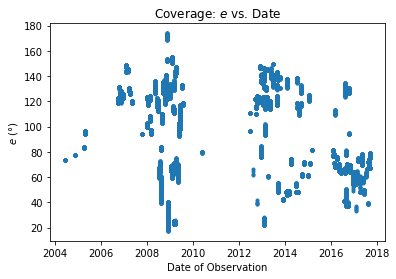

In [9]:
plt.plot(obsdata['Date'], obsdata['Mean Emission'],  '.')
plt.xlabel('Date of Observation')
plt.ylabel('$e$ (°)')
_=plt.title('Coverage: $e$ vs. Date')

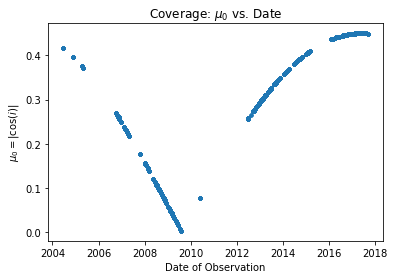

In [10]:
plt.plot(obsdata['Date'], np.abs(np.cos(np.radians(obsdata['Incidence']))), '.')
plt.xlabel('Date of Observation')
plt.ylabel('$\mu_0=|\cos(i)|$')
_=plt.title('Coverage: $\mu_0$ vs. Date')

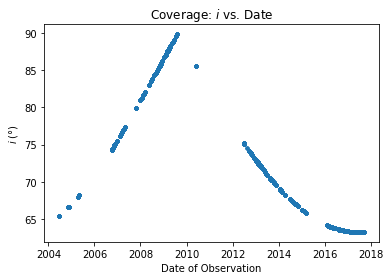

In [11]:
plt.plot(obsdata['Date'], obsdata['Incidence'], '.')
plt.xlabel('Date of Observation')
plt.ylabel('$i$ (°)')
_=plt.title('Coverage: $i$ vs. Date')

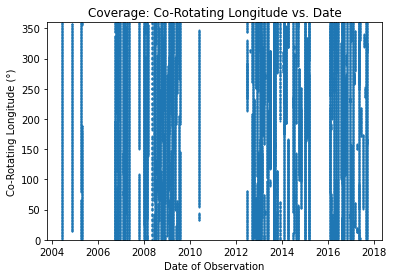

In [12]:
plt.plot(obsdata['Date'], (obsdata['Min Long']+obsdata['Max Long'])/2, '.', ms=2)
plt.xlabel('Date of Observation')
plt.ylabel('Co-Rotating Longitude (°)')
plt.ylim(0,360)
_=plt.title('Coverage: Co-Rotating Longitude vs. Date')